In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

In [2]:
import matplotlib.font_manager

# Configure matplotlib fonts.
matplotlib.font_manager.get_fontconfig_fonts()
font_location = "/Users/terrykwon/Library/Fonts/NotoSansCJKkr-Bold.otf"
font_name = matplotlib.font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name, weight='medium')
matplotlib.rc('axes', labelweight='medium', titleweight='medium')

In [3]:
df = pd.read_csv('data/preprocessed_2.csv')

# Replace NaN with blank strings.
df = df.where((pd.notnull(df)), '')

df.head(30)

,year,rank,id,title,artist,featuring,composer,lyricist,arranger,time
0,2011,71,2109691,아메리카노,10cm,,"권정열,윤철종","권정열,윤철종","권정열,윤철종",153
1,2011,98,2283069,사랑은 은하수 다방에서,10cm,,10cm,10cm,,170
2,2012,72,2671660,애상,10cm,,윤일상,이승호,,228
3,2016,18,5267814,봄이 좋냐??,10cm,,10cm,10cm,"10cm,이요한,이윤혁",205
4,2013,90,3020452,Somebody,15&,,"심은지,Ryan S.Jhun,Antwann Frost",심은지,"Ryan S.Jhun,Antwann Frost",190
5,2014,63,3424476,티가 나나봐,15&,,J.Y. Park `TheAsiansoul`,J.Y. Park `TheAsiansoul`,"J.Y. Park `TheAsiansoul`,홍지상",184
6,2008,32,1737878,이노래,2AM,,박진영,박진영,권태은,242
7,2009,56,1852703,친구의 고백,2AM,,JYP,JYP,"권태은,심은지",256
8,2010,29,2000940,죽어도 못 보내,2AM,,방시혁,방시혁,원더키드(Wonderkid),195
9,2010,49,2151378,전활 받지 않는 너에게,2AM,,방시혁,방시혁,"Miss Kay,원더키드(Wonderkid)",232


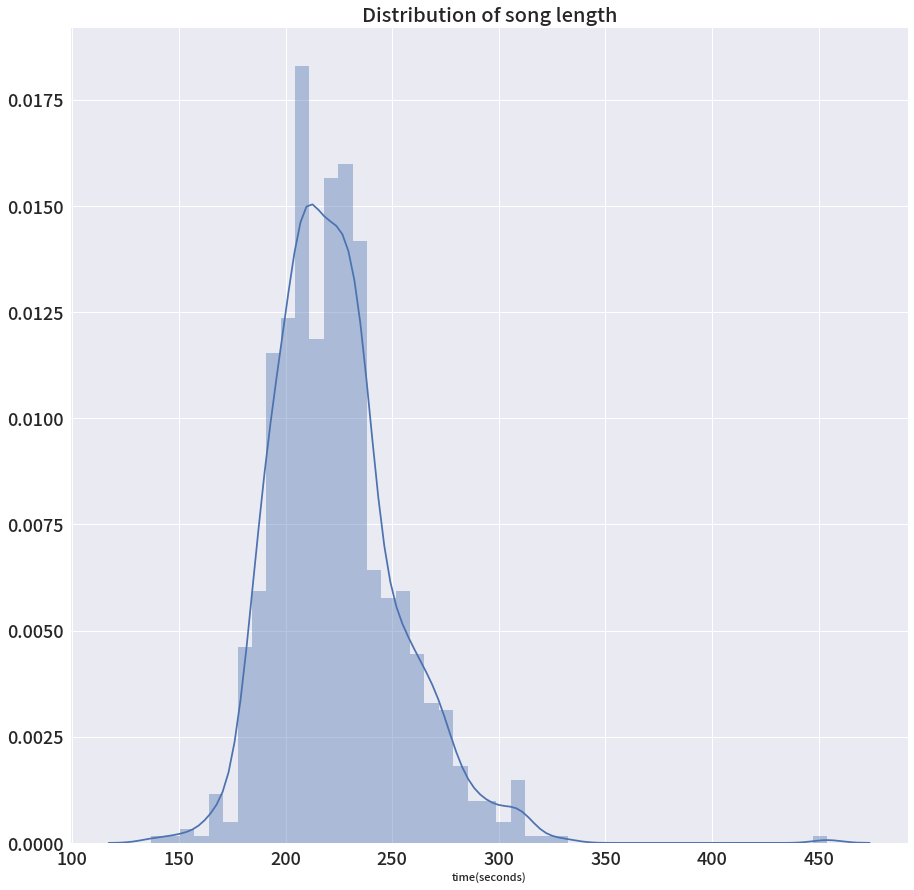

In [4]:
# Plot distribution of song length.
fig = plt.subplots()[0]
fig.set_size_inches(15, 15)

ax = sns.distplot(df['time'], norm_hist=True)
ax.set_title('Distribution of song length', fontsize=20)
ax.set_xlabel('time(seconds)')
ax.tick_params(labelsize=18)
# ax.set_ylabel('proportion')

In [5]:
# See how many songs make multiple appearances.
id_counter = Counter(df['id'])
id_counter.most_common(18)

[(2731865, 3),
 (3554976, 2),
 (3454839, 2),
 (1791095, 2),
 (3654947, 2),
 (1801879, 2),
 (2894860, 2),
 (2863051, 2),
 (2898127, 2),
 (3397226, 2),
 (1795215, 2),
 (2624992, 2),
 (1972353, 2),
 (4748766, 2),
 (2913839, 2),
 (4950971, 2),
 (2893342, 2),
 (2311495, 2)]

In [6]:
frequent_ids = [x[0] for x in id_counter.most_common(18)]
df.loc[df['id'].isin(frequent_ids)]

,year,rank,id,title,artist,featuring,composer,lyricist,arranger,time
39,2014,47,3554976,Lost Stars,Adam Levine,,,,,267
40,2015,54,3554976,Lost Stars,Adam Levine,,,,,267
52,2014,93,3454839,Problem(Feat. Iggy Azalea),Ariana Grande,Iggy Azalea,,,,194
53,2015,67,3454839,Problem(Feat. Iggy Azalea),Ariana Grande,Iggy Azalea,,,,194
59,2008,18,1791095,붉은 노을,BIGBANG,,이영훈,"이영훈,G-DRAGON",TEDDY,208
67,2009,75,1791095,붉은 노을,BIGBANG,,이영훈,"이영훈,G-DRAGON",TEDDY,208
166,2015,20,3654947,I`m Not The Only One,Sam Smith,,,,,239
167,2016,72,3654947,I`m Not The Only One,Sam Smith,,,,,239
177,2008,76,1801879,U R Man,SS501,,한상원,한상원,한상원,202
180,2009,80,1801879,U R Man,SS501,,한상원,한상원,한상원,202


In [7]:
artists = ','.join(df['artist']).split(',')
len(artists)

980

In [8]:
artist_counter = Counter(artists)
artist_counter.most_common(30)

[('다비치', 31),
 ('BIGBANG', 28),
 ('아이유(IU)', 21),
 ('2NE1', 20),
 ('허각', 15),
 ('티아라(T-ara)', 14),
 ('버스커 버스커', 14),
 ('백지영', 13),
 ('거미', 12),
 ('소녀시대', 12),
 ('씨스타', 11),
 ('이승기', 11),
 ('에일리', 10),
 ('포미닛(4minute)', 10),
 ('소유', 9),
 ('브라운아이드걸스', 9),
 ('원더걸스', 9),
 ('지아(Zia)', 9),
 ('케이윌(K.will)', 9),
 ('태연(Taeyeon)', 9),
 ('2AM', 8),
 ('노을', 8),
 ('씨야(SeeYa)', 8),
 ('비스트(Beast)', 8),
 ('악동뮤지션(AKMU)', 8),
 ('휘성', 8),
 ('G-DRAGON', 7),
 ('린(LYn)', 7),
 ('서인국', 7),
 ('애프터스쿨(After School)', 7)]

In [9]:
artist_counts = list(artist_counter.values())

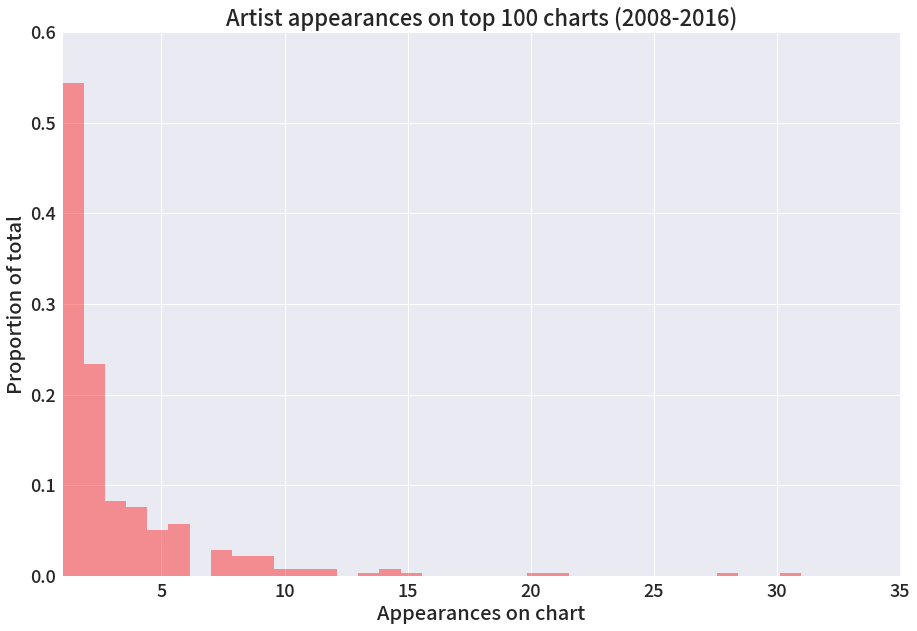

In [10]:
# Plot distribution of artist counts
fig = plt.subplots()[0]
fig.set_size_inches(15, 10)
plt.axis([1, 35, 0, 0.6])
plt.title('Artist appearances on top 100 charts (2008-2016)', fontsize=22)
ax = sns.distplot(artist_counts, norm_hist=True, kde=False, color='red')
plt.xlabel('Appearances on chart', fontsize=20)
plt.ylabel('Proportion of total', fontsize=20)
ax.tick_params(labelsize=18)

# plt.savefig('artist-appearances.png', transparent=False, bbox_inches='tight')

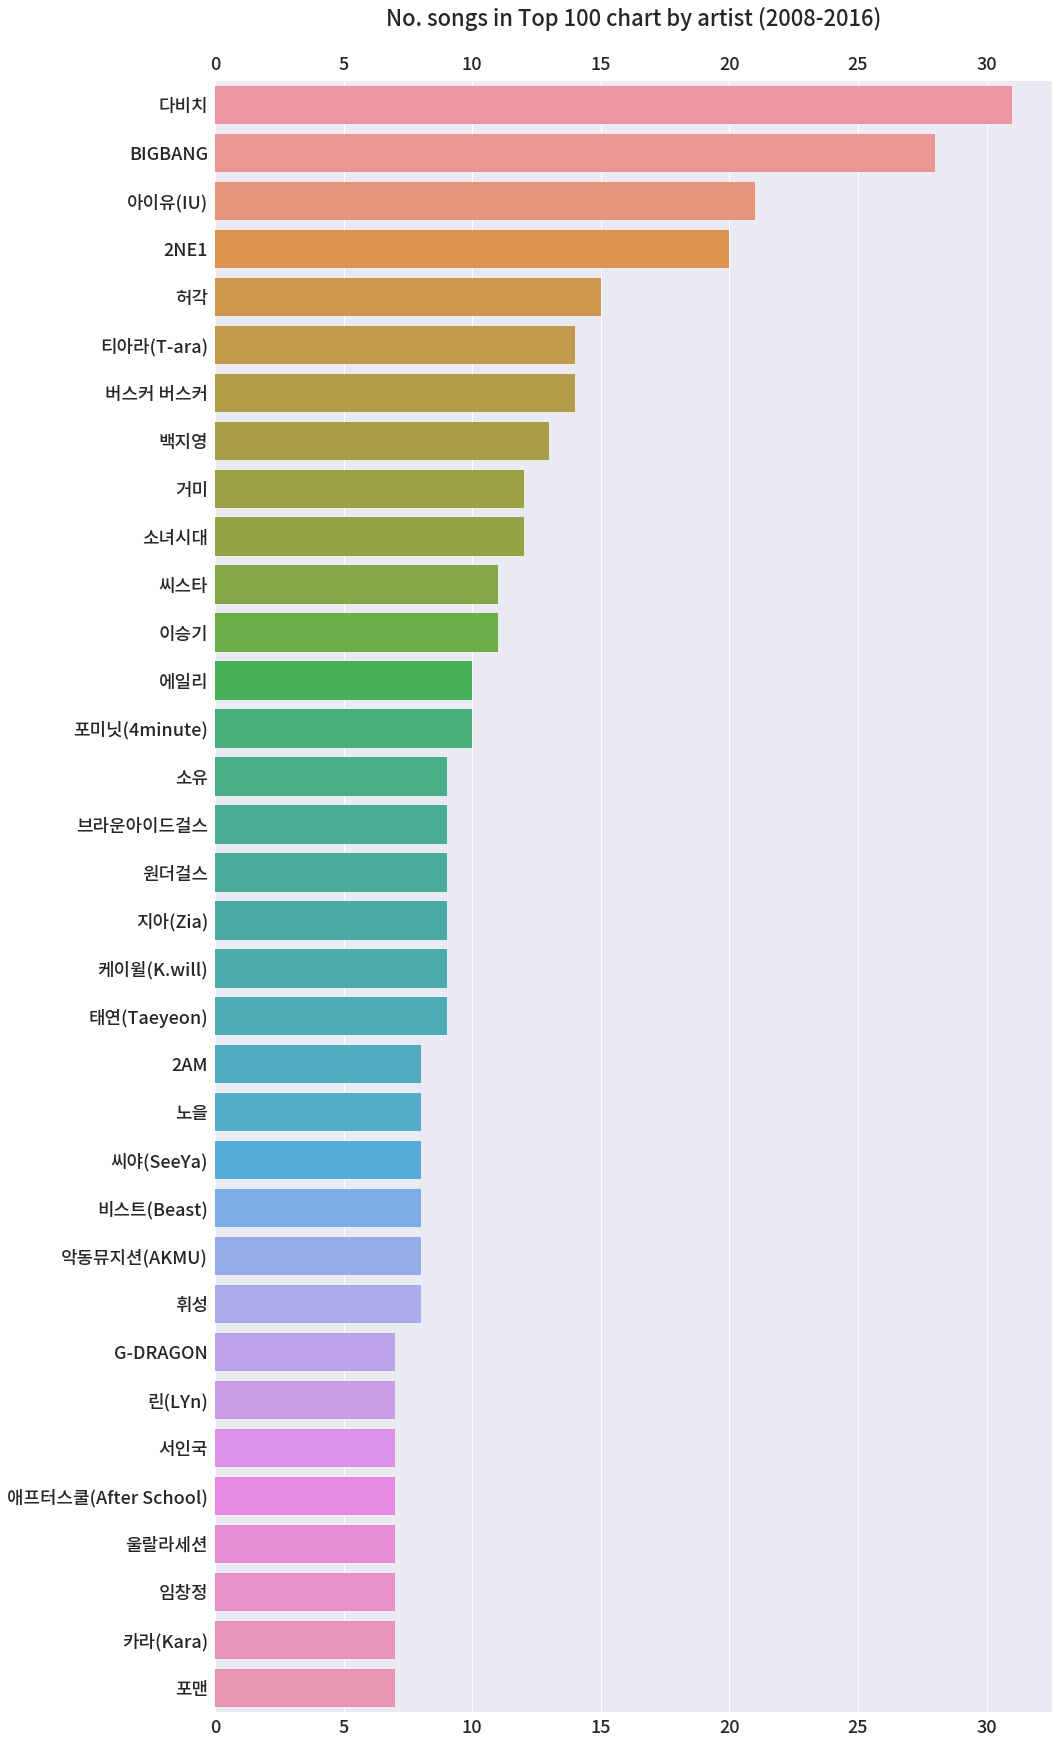

In [11]:
# Plot bar chart of artists in top 100
frequent_artists = artist_counter.most_common(34)
frequent_artists_x = [x[0] for x in frequent_artists]
frequent_artists_y = [x[1] for x in frequent_artists]

# sns.set(style="whitegrid")

fig = plt.subplots()[0]
fig.set_size_inches(15, 30)
ax = sns.barplot(x=frequent_artists_y, y=frequent_artists_x, orient='h')

plt.title('No. songs in Top 100 chart by artist (2008-2016)', y=1.03, fontsize=22)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top
ax.tick_params(labeltop=True)
ax.tick_params(labelsize=18)

# plt.savefig('fig2-1.png', transparent=False, bbox_inches='tight')

In [18]:
df.loc[df['rank'] <= 10]

,year,rank,id,title,artist,featuring,composer,lyricist,arranger,time
14,2009,3,1902608,I Don`t Care,2NE1,,"TEDDY,KUSH","TEDDY,KUSH","TEDDY,KUSH",239
15,2009,9,1872318,Fire,2NE1,,TEDDY,TEDDY,TEDDY,224
19,2010,8,2129218,Go Away,2NE1,,TEDDY,TEDDY,,219
23,2011,9,2433712,Ugly,2NE1,,"TEDDY,Lydia Paek",TEDDY,TEDDY,248
27,2012,4,2804968,I Love You,2NE1,,"TEDDY,Lydia Paek",TEDDY,TEDDY,237
34,2009,6,1865019,Again ＆ Again,2PM,,JYP,JYP,"JYP,홍지상",244
49,2014,5,3399019,Mr. Chu (On Stage),Apink,,"이단옆차기,Seion","이단옆차기,David Kim",영광의 얼굴들,204
56,2008,2,1751350,하루하루,BIGBANG,,"G-DRAGON,Daishi Dance",G-DRAGON,Daishi Dance,256
57,2008,4,1612629,마지막 인사,BIGBANG,,"G-DRAGON,용감한 형제",G-DRAGON,용감한 형제,231
71,2012,9,2702905,FANTASTIC BABY,BIGBANG,,"G-DRAGON,TEDDY","G-DRAGON,T.O.P,TEDDY",TEDDY,231


In [12]:
composers = ','.join(df['composer']).split(',')
composers = list(filter(lambda x: x != '', composers))
len(composers)

1380

In [13]:
composer_counter = Counter(composers)
composer_counter.most_common(47)

[('김도훈', 59),
 ('TEDDY', 49),
 ('조영수', 36),
 ('용감한 형제', 29),
 ('G-DRAGON', 27),
 ('신사동 호랭이', 25),
 ('이단옆차기', 24),
 ('방시혁', 21),
 ('이민수', 20),
 ('이상호', 16),
 ('최규성', 15),
 ('박근태', 13),
 ('장범준', 13),
 ('J.Y. Park `TheAsiansoul`', 12),
 ('한재호', 12),
 ('김승수', 11),
 ('KUSH', 10),
 ('이현승', 10),
 ('전해성', 10),
 ('JYP', 9),
 ('Zion.T', 9),
 ('이기', 9),
 ('라도', 8),
 ('싸이(Psy)', 8),
 ('유건형', 8),
 ('류재현', 8),
 ('지코(ZICO)', 8),
 ('개미', 8),
 ('김세진', 8),
 ('한상원', 8),
 ('강지원', 8),
 ('이찬혁', 8),
 ('타블로', 8),
 ('박진영', 7),
 ('코끼리왕국', 7),
 ('그레이(GRAY)', 7),
 ('이종훈', 7),
 ('김기범', 7),
 ('김진태', 7),
 ('Choice37', 6),
 ('김건우', 6),
 ('Pop Time', 6),
 ('블랙아이드필승', 6),
 ('PJ', 6),
 ('이트라이브(E-Tribe)', 6),
 ('프라이머리(Primary)', 6),
 ('아이유(IU)', 6)]

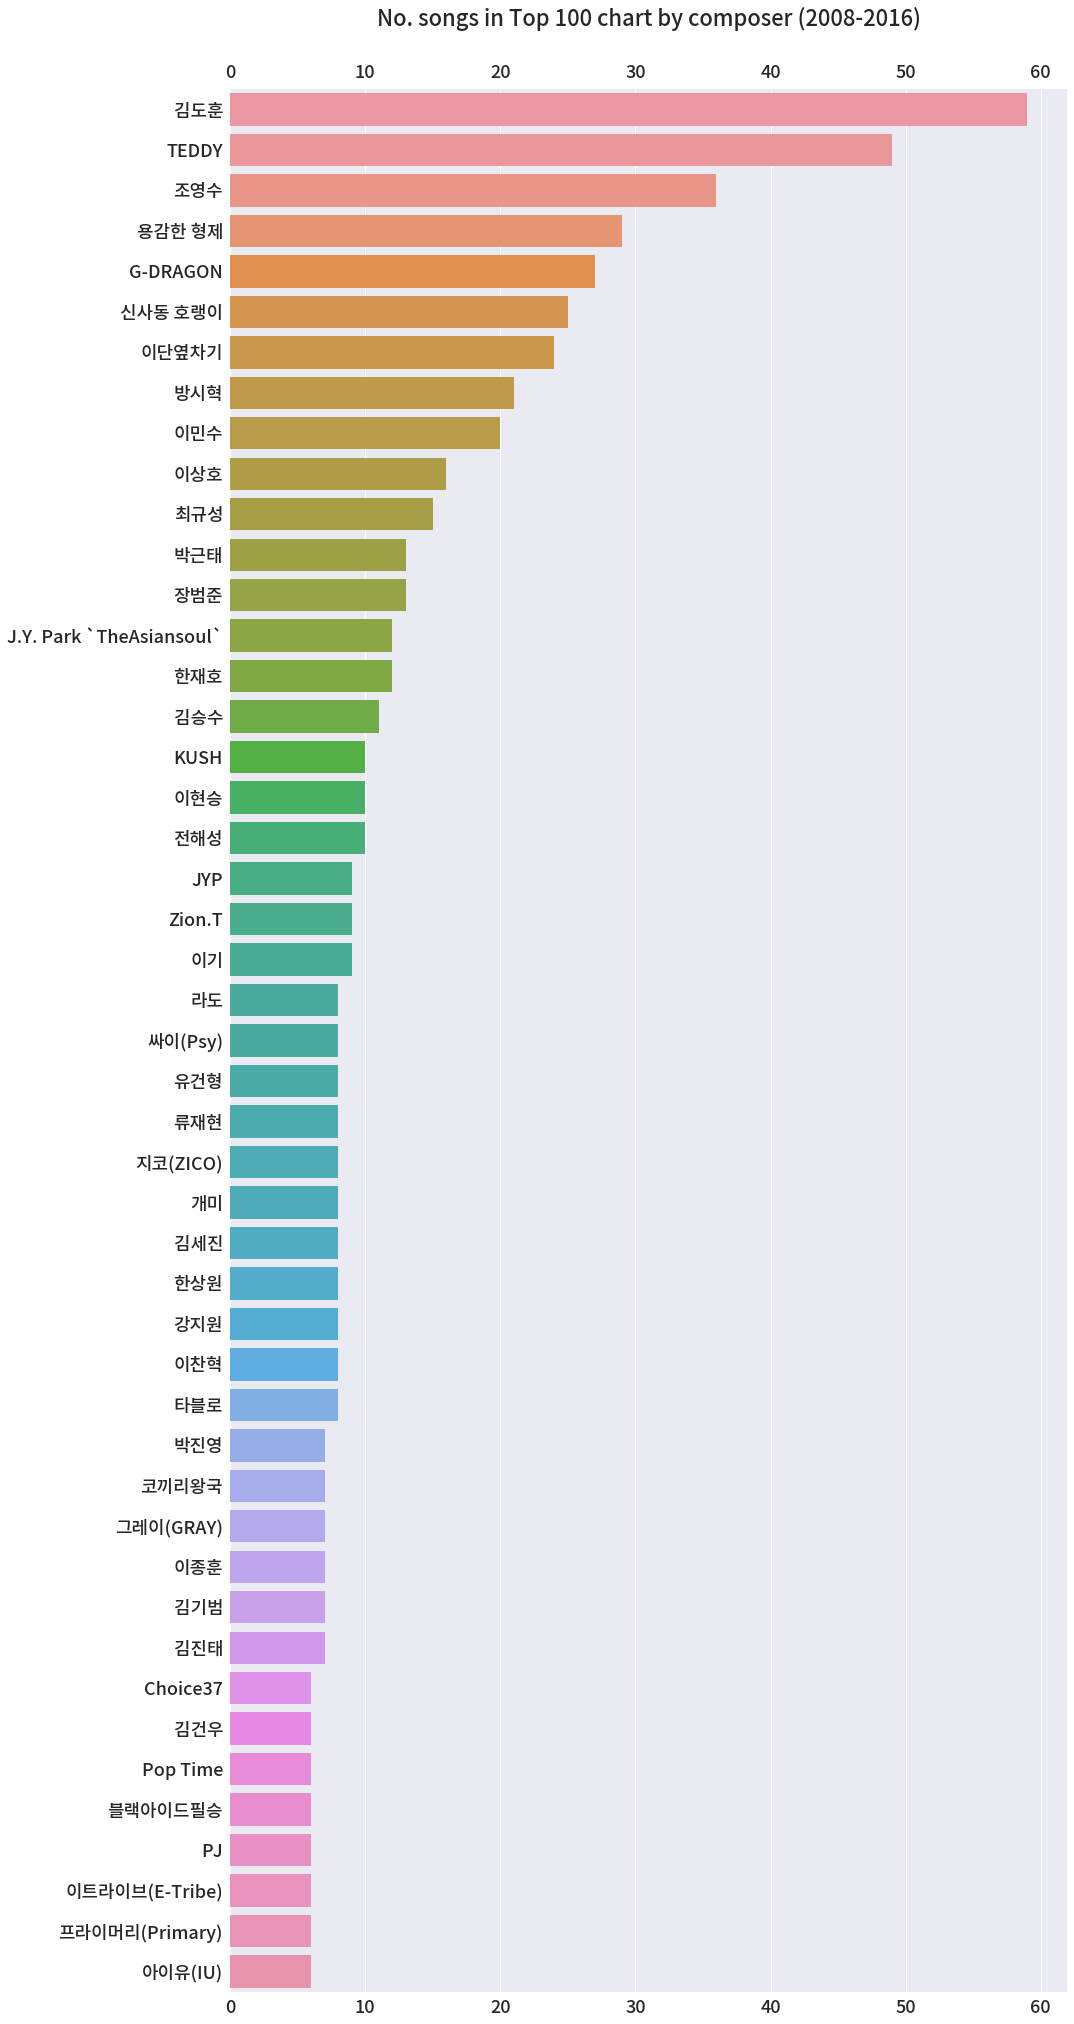

In [14]:
# Plot bar chart of composers in top 100
frequent_composers = composer_counter.most_common(47)
frequent_composers_x = [x[0] for x in frequent_composers]
frequent_composers_y = [x[1] for x in frequent_composers]

fig, ax = plt.subplots()
fig.set_size_inches(15, 35)

ax = sns.barplot(x=frequent_composers_y, y=frequent_composers_x)

plt.title('No. songs in Top 100 chart by composer (2008-2016)', y=1.03, fontsize=22)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top
ax.tick_params(labeltop=True)
ax.tick_params(labelsize=18)

# plt.savefig('fig3-1.png', transparent=False, bbox_inches='tight')

In [15]:
lyricists = ','.join(df['lyricist']).split(',')
lyricists = list(filter(lambda x: x != '', lyricists))
len(lyricists)

1293

In [16]:
lyricist_counter = Counter(lyricists)
lyricist_counter.most_common(30)

[('TEDDY', 45),
 ('김이나', 36),
 ('G-DRAGON', 34),
 ('용감한 형제', 25),
 ('신사동 호랭이', 24),
 ('이단옆차기', 22),
 ('안영민', 21),
 ('방시혁', 20),
 ('강은경', 18),
 ('최갑원', 18),
 ('T.O.P', 16),
 ('지훈', 16),
 ('휘성', 16),
 ('최규성', 14),
 ('민연재', 13),
 ('개리', 13),
 ('장범준', 13),
 ('J.Y. Park `TheAsiansoul`', 12),
 ('김도훈', 11),
 ('송수윤', 11),
 ('한성호', 10),
 ('개미', 10),
 ('MC몽', 10),
 ('지코(ZICO)', 10),
 ('Zion.T', 10),
 ('JYP', 9),
 ('싸이(Psy)', 9),
 ('김기범', 8),
 ('라도', 8),
 ('류재현', 8)]

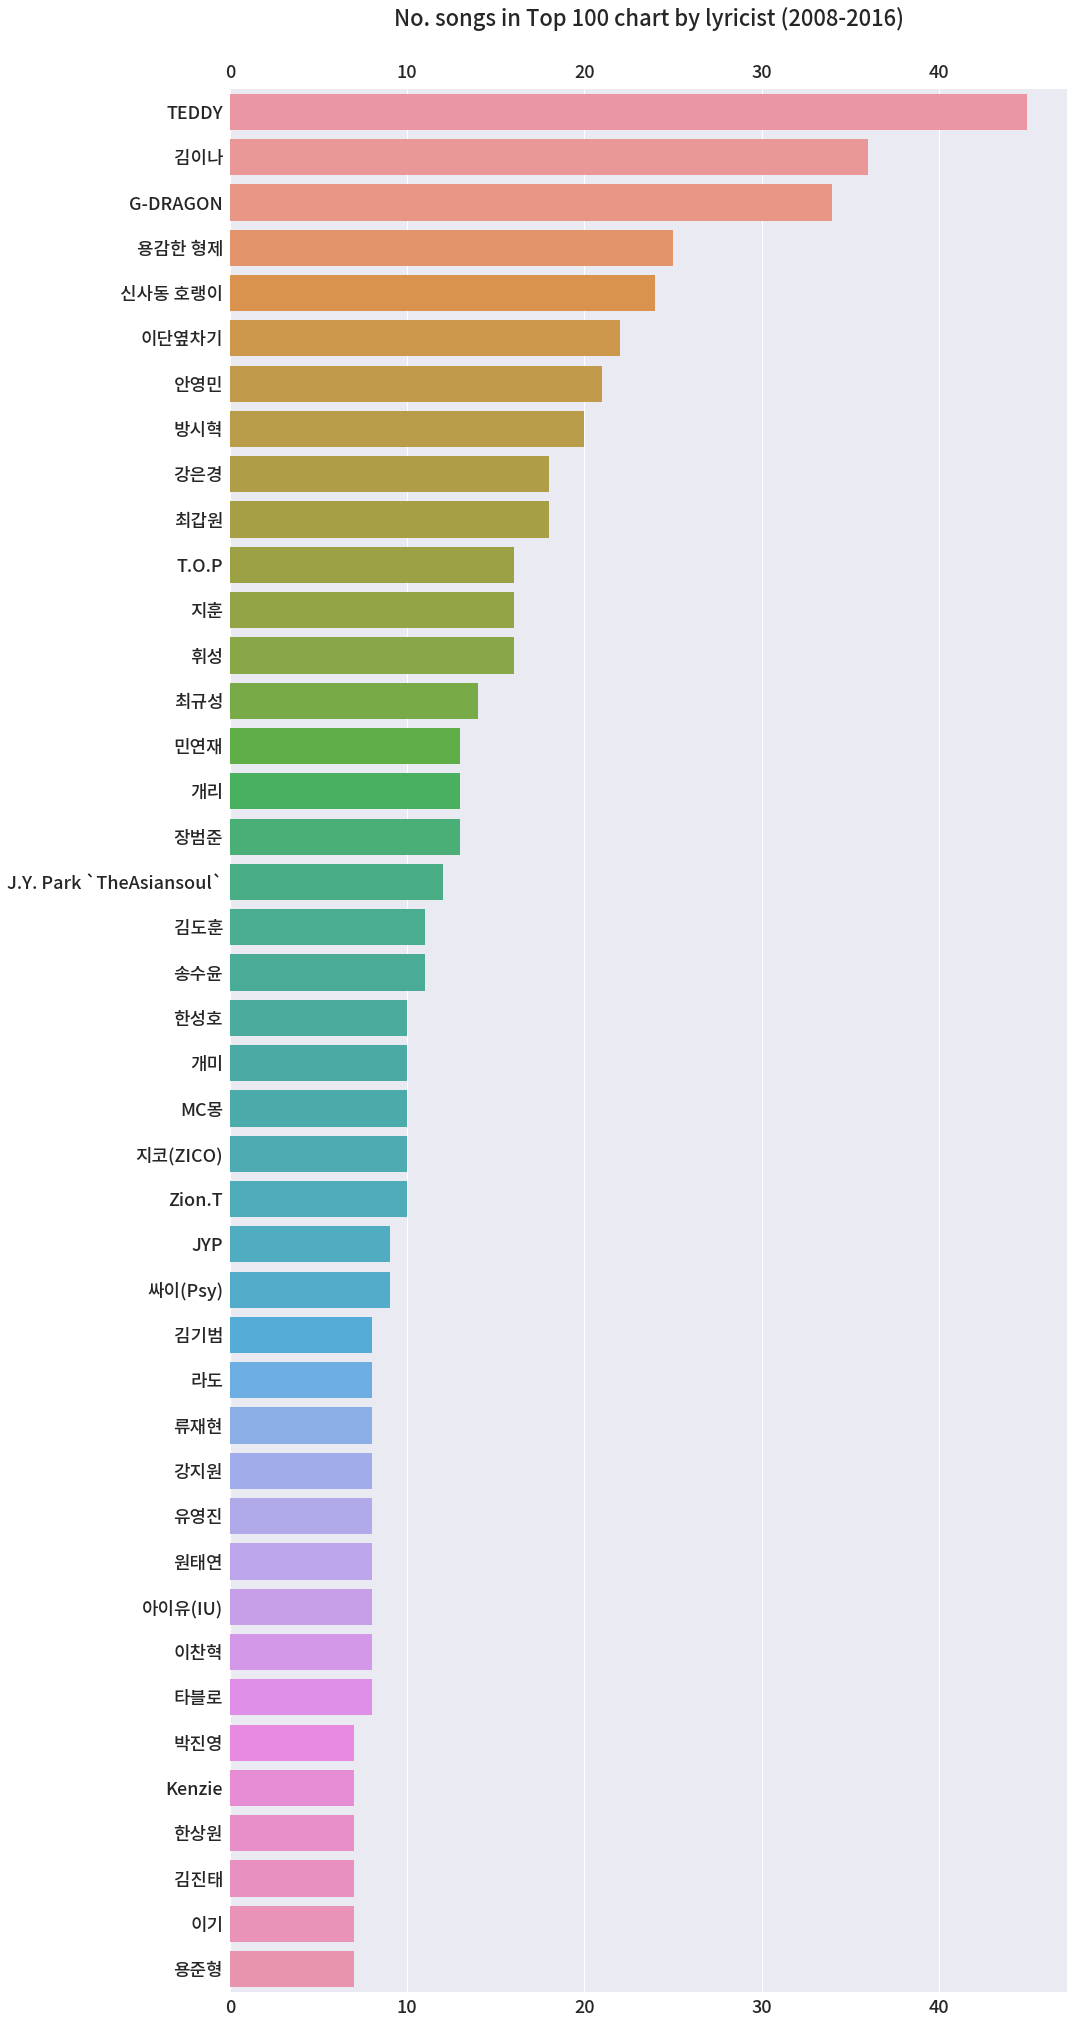

In [17]:
# Plot bar chart of composers in top 100
frequent_lyricists = lyricist_counter.most_common(42)
frequent_lyricists_x = [x[0] for x in frequent_lyricists]
frequent_lyricists_y = [x[1] for x in frequent_lyricists]

fig, ax = plt.subplots()
fig.set_size_inches(15, 35)

ax = sns.barplot(x=frequent_lyricists_y, y=frequent_lyricists_x)

plt.title('No. songs in Top 100 chart by lyricist (2008-2016)', y=1.03, fontsize=22)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top
ax.tick_params(labeltop=True)
ax.tick_params(labelsize=18)

# plt.savefig('fig4-1.png', transparent=False, bbox_inches='tight')